### Dynamic Programing

#### Finite Horizon Problem

Consider the following general problem:

$$V(y_0, 0) = \max_{\substack{\{x_t\}_{t = 0}^{T - 1}}} \sum_{t = 0}^{T - 1} \beta_t u(x_t, y_t) $$

such that:

$$ y_{t + 1} = f{x_t, y_t}$$

where $y_t$ is the state variable and $x_t$ is the control variable.

#### Backwards Induction

$$V(y_0, 0) = \max_{\substack{\{x_t\}_{t = 0}^{T - 1}}} \sum_{t = 0}^{T - 1} \beta_t u(x_t, y_t) $$

$$= \max_{\substack{\{x_t\}_{t = 0}^{T - 1}}} [u(x_0, y_0) + \sum_{t = 0}^{T - 2} \beta_t u(x_t, y_t)]$$

$$ = \max_{\substack{\{x_t\}_{t = 0}^{T - 1}}} [u(x_0, y_0) + \beta V(y_1, 1)]$$

There, we can solove the problem, if and only if we knew $V(., 1)$! 

BUT, we know that $V(., T) = 0$!! $\to$  solve for $V(., T - 1)$

#### Cake-Eating Problem

$$V(y_0) = \max_{\substack{\{x_t\}_{t = 0}^{T}}} \sum_{t = 0}^T \beta^tlog(x_t)$$

subject to:

$$y_t + 1 = y_t - x_t$$

$$x_t = 0; y_{t + 1} = 0$$

$$y_0 = A$$



#### Backwards Induiction: Solutin Method

**Steps**

1. Set up V-grid that defines the value function over T states
2. Define state variables grid on which you will evaluate V(., t)
3. Set up the loop over backwards induction
    * at each t
        * Construct a spline function for $V(., t + 1)$
        * Set up a grid of potential $x_t$ choices (that satisfies contraints)
        * Find optinal choices, saving it as well as the value function

In [5]:
import scipy as sp
import numpy as np
from scipy.interpolate import CubicSpline
from math import log
import matplotlib.pyplot as plt
#import plotly.express as px

In [18]:
# Model primitives
T = 50 # Number of periods
β = .9 # Discount factor

# Grid of potential state variables
N_state = 50
min_state = .01
max_state = 10
y0_state = np.linspace(min_state, max_state, N_state)

# Options for grid to maximize over control variables
N_opt = 10000
eps = .001

# Initialize value/control variables arrays
V_grid = np.zeros((N_state, T + 1))
x_opt = np.zeros((N_state, T + 1))

# Utility function
def util(x):
    return np.log(x)

In [22]:
# Loop (backwards) through each period
for i in reversed(range(T)):
    
    # Spline of all y0 options and the column that corresponds to each period
    V_prime_spline = CubicSpline(y0_state, V_grid[:, i + 1])
    
    # Loop over values of the state variable
    for j in range(N_state):
        
        # Grid of control variables to optimize over (from almost 0, to almost the state variable)
        x_grid = np.linspace(eps, y0_state[j] - eps, N_opt)
        
        # Calculate utility for each choice in x grid, plus the value in next period
        # given the choice of the control variable (times a di)
        vals = util(x_grid) + β*V_prime_spline(y0_state[j] - x_grid) 
        
        # Max value
        V_grid[j,i] = np.max(vals)

        # Control choice corresponding to max value
        x_opt[j, i] = x_grid[np.argmax(vals)]

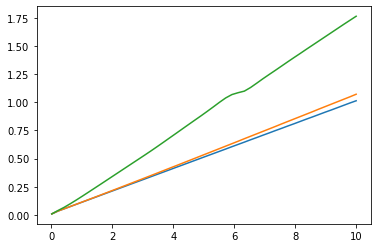

In [32]:
plt.plot(y0_state,x_opt[:,0])
plt.plot(y0_state,x_opt[:,25])
plt.plot(y0_state,x_opt[:,42])
plt.show()
#Brian comment: Looks like there is some numerical error causing a kink in the top line. Or perhaps there is a big above. 